In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from knn import KNN
from metrics import binary_classification_metrics

# Toy example

Here is a toy example for a better understanding of the underhood steps in `knn` approach.

In [3]:
np.random.seed(101)
ndots = 1000
area1 = np.random.random(ndots).reshape((ndots // 2, 2))
area2 = np.random.random(ndots).reshape((ndots // 2, 2))

area2[:, 0] = area2[:, 0] - 0.75
area2[:, 1] = area2[:, 1] - 0.75

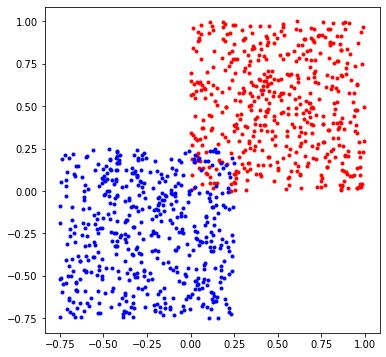

In [4]:
fig = plt.figure(figsize = (6, 6))
plt.plot(area1[:, 0], area1[:, 1], "r.")
plt.plot(area2[:, 0], area2[:, 1], "b.")

# Generate train and test data
Let's generate train and test data for checking `knn` approach.

In [5]:
universe_X = np.row_stack((area1, area2))
universe_y = np.concatenate((np.array([True] * int(ndots // 2)), \
    np.array([False] * int(ndots // 2))))
universe_X.shape, universe_y.shape

((1000, 2), (1000,))

In [6]:
train_size = int(universe_X.shape[0] * 0.8)
test_size = universe_X.shape[0] - train_size
train_size, test_size

(800, 200)

In [7]:
np.random.seed(101)
universe_indxs = np.arange(universe_X.shape[0])
train_indxs = np.random.choice(universe_indxs, size=train_size, replace=False)
test_indxs = universe_indxs[~np.in1d(universe_indxs, train_indxs)]

In [8]:
train_X = universe_X[train_indxs, :]
train_y = universe_y[train_indxs]

test_X = universe_X[test_indxs, :]
test_y = universe_y[test_indxs]

In [9]:
k_options = np.arange(1, 10)


for k in k_options:
    knnc = KNN(k=k)
    knnc.fit(train_X, train_y)
    prediction = knnc.predict(test_X)
    precision, recall, f1, accuracy = binary_classification_metrics(prediction, test_y)
    print(f"k = {k}, precision = {precision:.2f}, recall = {recall:.2f}, f1 = {f1:.2f}")

k = 1, precision = 0.98, recall = 0.99, f1 = 0.98
k = 2, precision = 1.00, recall = 0.97, f1 = 0.98
k = 3, precision = 0.97, recall = 0.98, f1 = 0.97
k = 4, precision = 0.98, recall = 0.98, f1 = 0.98
k = 5, precision = 0.97, recall = 0.99, f1 = 0.98
k = 6, precision = 0.98, recall = 0.98, f1 = 0.98
k = 7, precision = 0.95, recall = 0.99, f1 = 0.97
k = 8, precision = 0.98, recall = 0.98, f1 = 0.98
k = 9, precision = 0.97, recall = 0.99, f1 = 0.98


In [10]:
k = 5
knnc = KNN(k=k)
knnc.fit(train_X, train_y)
prediction = knnc.predict(test_X)

(-0.75, 1.0)

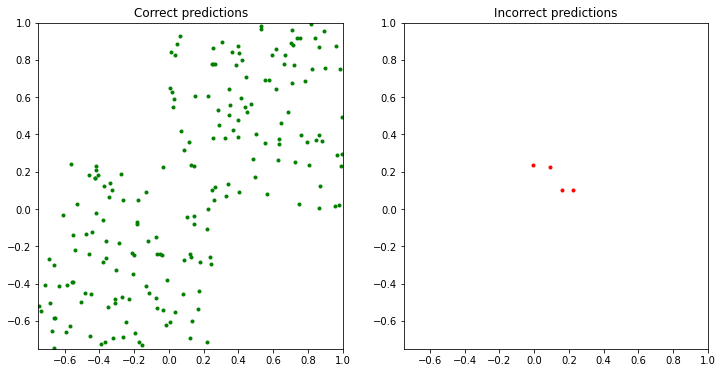

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
axs.flat[0].plot(test_X[prediction == test_y, 0], test_X[prediction == test_y, 1], "g.")
axs.flat[0].title.set_text('Correct predictions')
axs.flat[0].set_xlim([-0.75, 1])
axs.flat[0].set_ylim([-0.75, 1])


axs.flat[1].plot(test_X[prediction != test_y, 0], test_X[prediction != test_y, 1], "r.")
axs.flat[1].title.set_text('Incorrect predictions')
axs.flat[1].set_xlim([-0.75, 1])
axs.flat[1].set_ylim([-0.75, 1])
